In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Check if GPU is mounted
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


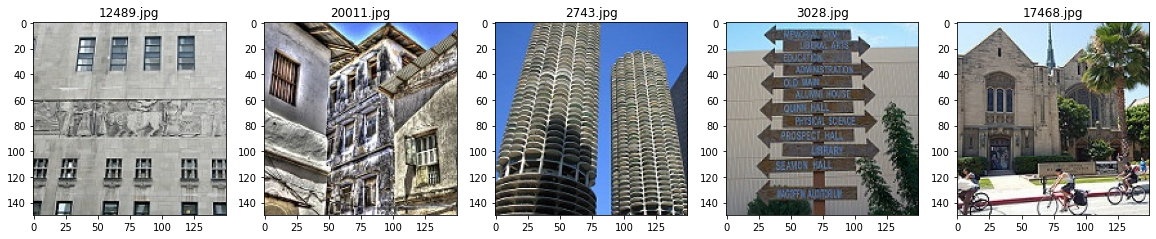

In [2]:
import random

#Load Building folders to display and check dir

plt.figure(figsize=(20,20))

building_folder='natural_scene_data/seg_train/seg_train/buildings/'

#Randomly display 5 house out of building folder
for i in range(5):
    file = random.choice(os.listdir(building_folder))
    image_path= os.path.join(building_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

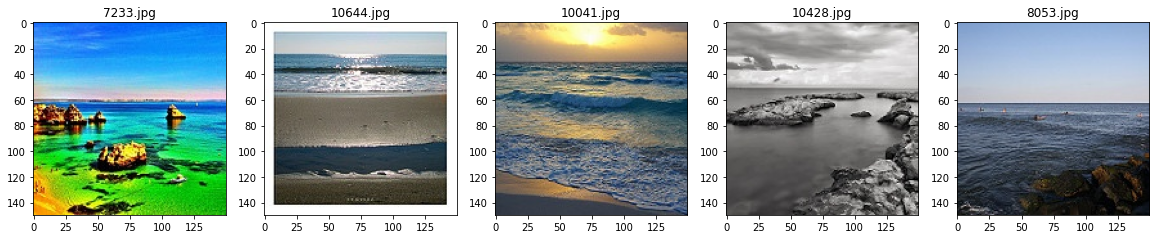

In [3]:
# Displaying Random 5 Beautiful Sea
sea_folder='natural_scene_data/seg_train/seg_train/sea/'
plt.figure(figsize=(20,20))
#Randomly display 5 house out of building folder
for i in range(5):
    file = random.choice(os.listdir(sea_folder))
    image_path= os.path.join(sea_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
IMG_WIDTH=200 # Later function to resize image
IMG_HEIGHT=200

# Create final dir for 5 folder of datasets, building, forest etc...
test_image_folder='natural_scene_data/seg_train/seg_train/'

In [5]:
# Function to easily process and create desired dataset
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[] # To append Classname
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name


img_data, class_name =create_dataset(test_image_folder)

In [6]:
# Generating class label dictionary later to map into Y_train dataset
class_dict={k: v for v, k in enumerate(np.unique(class_name))}
class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [7]:
# Map the Y train set with dictionary class above
target_val=  [class_dict[class_name[i]] for i in range(len(class_name))]
len(target_val)

14034

In [8]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    
unique(target_val) # Check if the label mapping is correct

[0 1 2 3 4 5]


In [9]:
# Creating the CNN Model
#CNN SELECTED because its nature best for image classification
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Conv2d high filter to less filter architecture
model = Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), padding='valid')) #Input shape 3 represent BGR?
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output Layer
model.add(Dense(6, activation='softmax')) # Softmax selected for class > 2

In [10]:
img_data = np.array(img_data, np.float32)
target_val = np.array(list(map(int,target_val)), np.float32) # Target value is an array, need convert to np float 32

In [11]:
# Convert X train set
#img_data = np.array(img_data, np.float32)
#target_val = np.array(list(map(int,target_val)), np.float32) # Target value is an array, need convert to np float 32


#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(x=img_data, y=target_val, epochs=10, batch_size=32)

In [12]:
# Validation

validate_image_folder='natural_scene_data/seg_test/seg_test/'

validate_img_data, validate_class_name =create_dataset(validate_image_folder)

In [13]:
val_class_dict={k: v for v, k in enumerate(np.unique(validate_class_name))}
val_class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [14]:
validate_target_val=  [val_class_dict[validate_class_name[i]] for i in range(len(validate_class_name))]
len(validate_target_val)

3000

In [15]:
validate_img_data = np.array(validate_img_data, np.float32)
validate_target_val = np.array(list(map(int,validate_target_val)), np.float32) # Target value is an array, need convert to np float 32

In [16]:
unique(validate_target_val) # Check if the label mapping is correct

[0. 1. 2. 3. 4. 5.]


In [17]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(16,(3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), padding='valid')) #Input shape 3 represent BGR?
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(32,(3, 3), activation='relu', padding='valid'))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64,(3, 3), activation='relu', padding='valid'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.1))

# Output Layer
model2.add(Dense(6, activation='softmax')) # Softmax selected for class > 2

In [18]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(x=img_data, y=target_val, epochs=15, batch_size=32, validation_data=(validate_img_data, validate_target_val))

Epoch 1/15
439/439 [==============================] - 19s 26ms/step - loss: 1.0025 - accuracy: 0.6040 - val_loss: 0.7944 - val_accuracy: 0.7193
Epoch 2/15
439/439 [==============================] - 9s 21ms/step - loss: 0.6707 - accuracy: 0.7557 - val_loss: 0.5963 - val_accuracy: 0.7900
Epoch 3/15
439/439 [==============================] - 9s 21ms/step - loss: 0.4858 - accuracy: 0.8281 - val_loss: 0.6434 - val_accuracy: 0.7860
Epoch 4/15
439/439 [==============================] - 9s 21ms/step - loss: 0.3624 - accuracy: 0.8735 - val_loss: 0.7422 - val_accuracy: 0.7587
Epoch 5/15
439/439 [==============================] - 9s 22ms/step - loss: 0.2239 - accuracy: 0.9251 - val_loss: 0.7270 - val_accuracy: 0.8007
Epoch 6/15
439/439 [==============================] - 10s 22ms/step - loss: 0.1530 - accuracy: 0.9496 - val_loss: 0.8589 - val_accuracy: 0.7860
Epoch 7/15
439/439 [==============================] - 10s 22ms/step - loss: 0.0978 - accuracy: 0.9694 - val_loss: 0.8694 - val_accuracy: 0.7

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_3 (Dense)             (None, 32)               

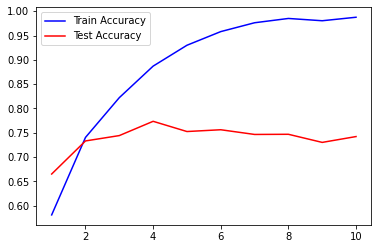

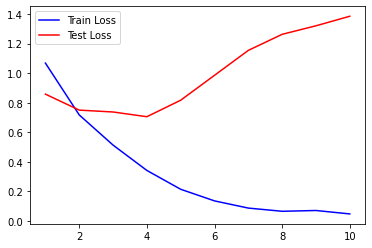

In [19]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()